In [1]:
import sys
import os
sys.path.append('../')

In [3]:
import torch
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
from torchvision import models, transforms
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
from __future__ import division

from utils import norm_col_init, weights_init

In [6]:
# importing model from models file
from model import A3Clstm_debug

In [7]:
model_weights = torch.load("../model_vizdoom_a3c/a3c.dat", map_location={'cuda:0': 'cpu', 'cuda:1' : 'cpu'})

In [8]:
# conv layers to this network
print(model_weights['conv1.weight'].size()) 
print(model_weights['conv2.weight'].size())
print(model_weights['conv3.weight'].size())
print(model_weights['conv4.weight'].size())

torch.Size([32, 1, 5, 5])
torch.Size([32, 32, 5, 5])
torch.Size([64, 32, 4, 4])
torch.Size([64, 64, 3, 3])


<Figure size 432x288 with 0 Axes>

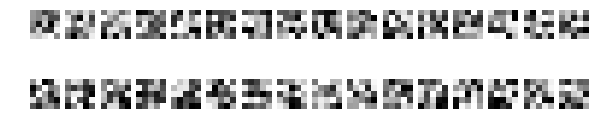

In [9]:
fig = plt.figure()
plt.figure(figsize=(10,10))
for idx, filt  in enumerate(model_weights['conv1.weight']):
    #print(filt[0, :, :])
    plt.subplot(8,16, idx + 1)
    plt.imshow(filt[0, :, :], cmap="gray")
    plt.axis('off')
    
    
# fig.show()

## Passing images

In [10]:
channels = 1
resolution = (channels, 80, 80)

In [11]:
network = A3Clstm_debug(channels, 8)
network.load_state_dict(model_weights)

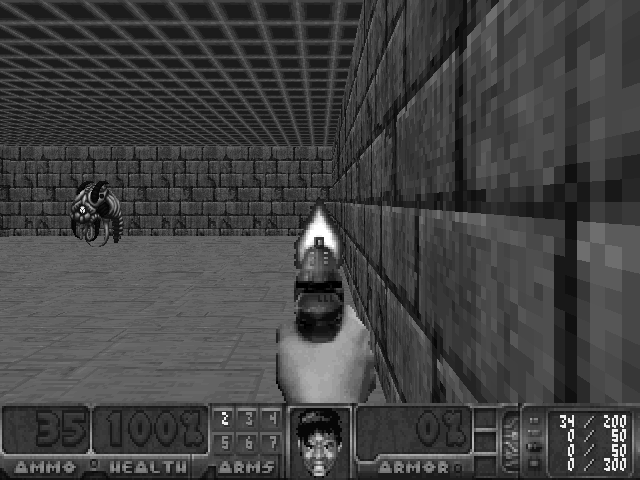

In [35]:
from PIL import Image
img = Image.open('../image3.png').convert('LA')
img

In [36]:
preprocess = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((resolution[2], resolution[1])),
    transforms.ToTensor()
])

tensor_test = preprocess(img)

In [37]:
test_var = tensor_test.unsqueeze(0)
hx = torch.zeros(1, 512)
cx = torch.zeros(1, 512)
output = network((test_var, (hx, cx)))

In [38]:
plot_path = "./plots"
steps = 3

# reload when changing step
model_weights = torch.load("../model_vizdoom_a3c/a3c.dat", map_location={'cuda:0': 'cpu', 'cuda:1' : 'cpu'})

torch.Size([32, 80, 80])


<Figure size 432x288 with 0 Axes>

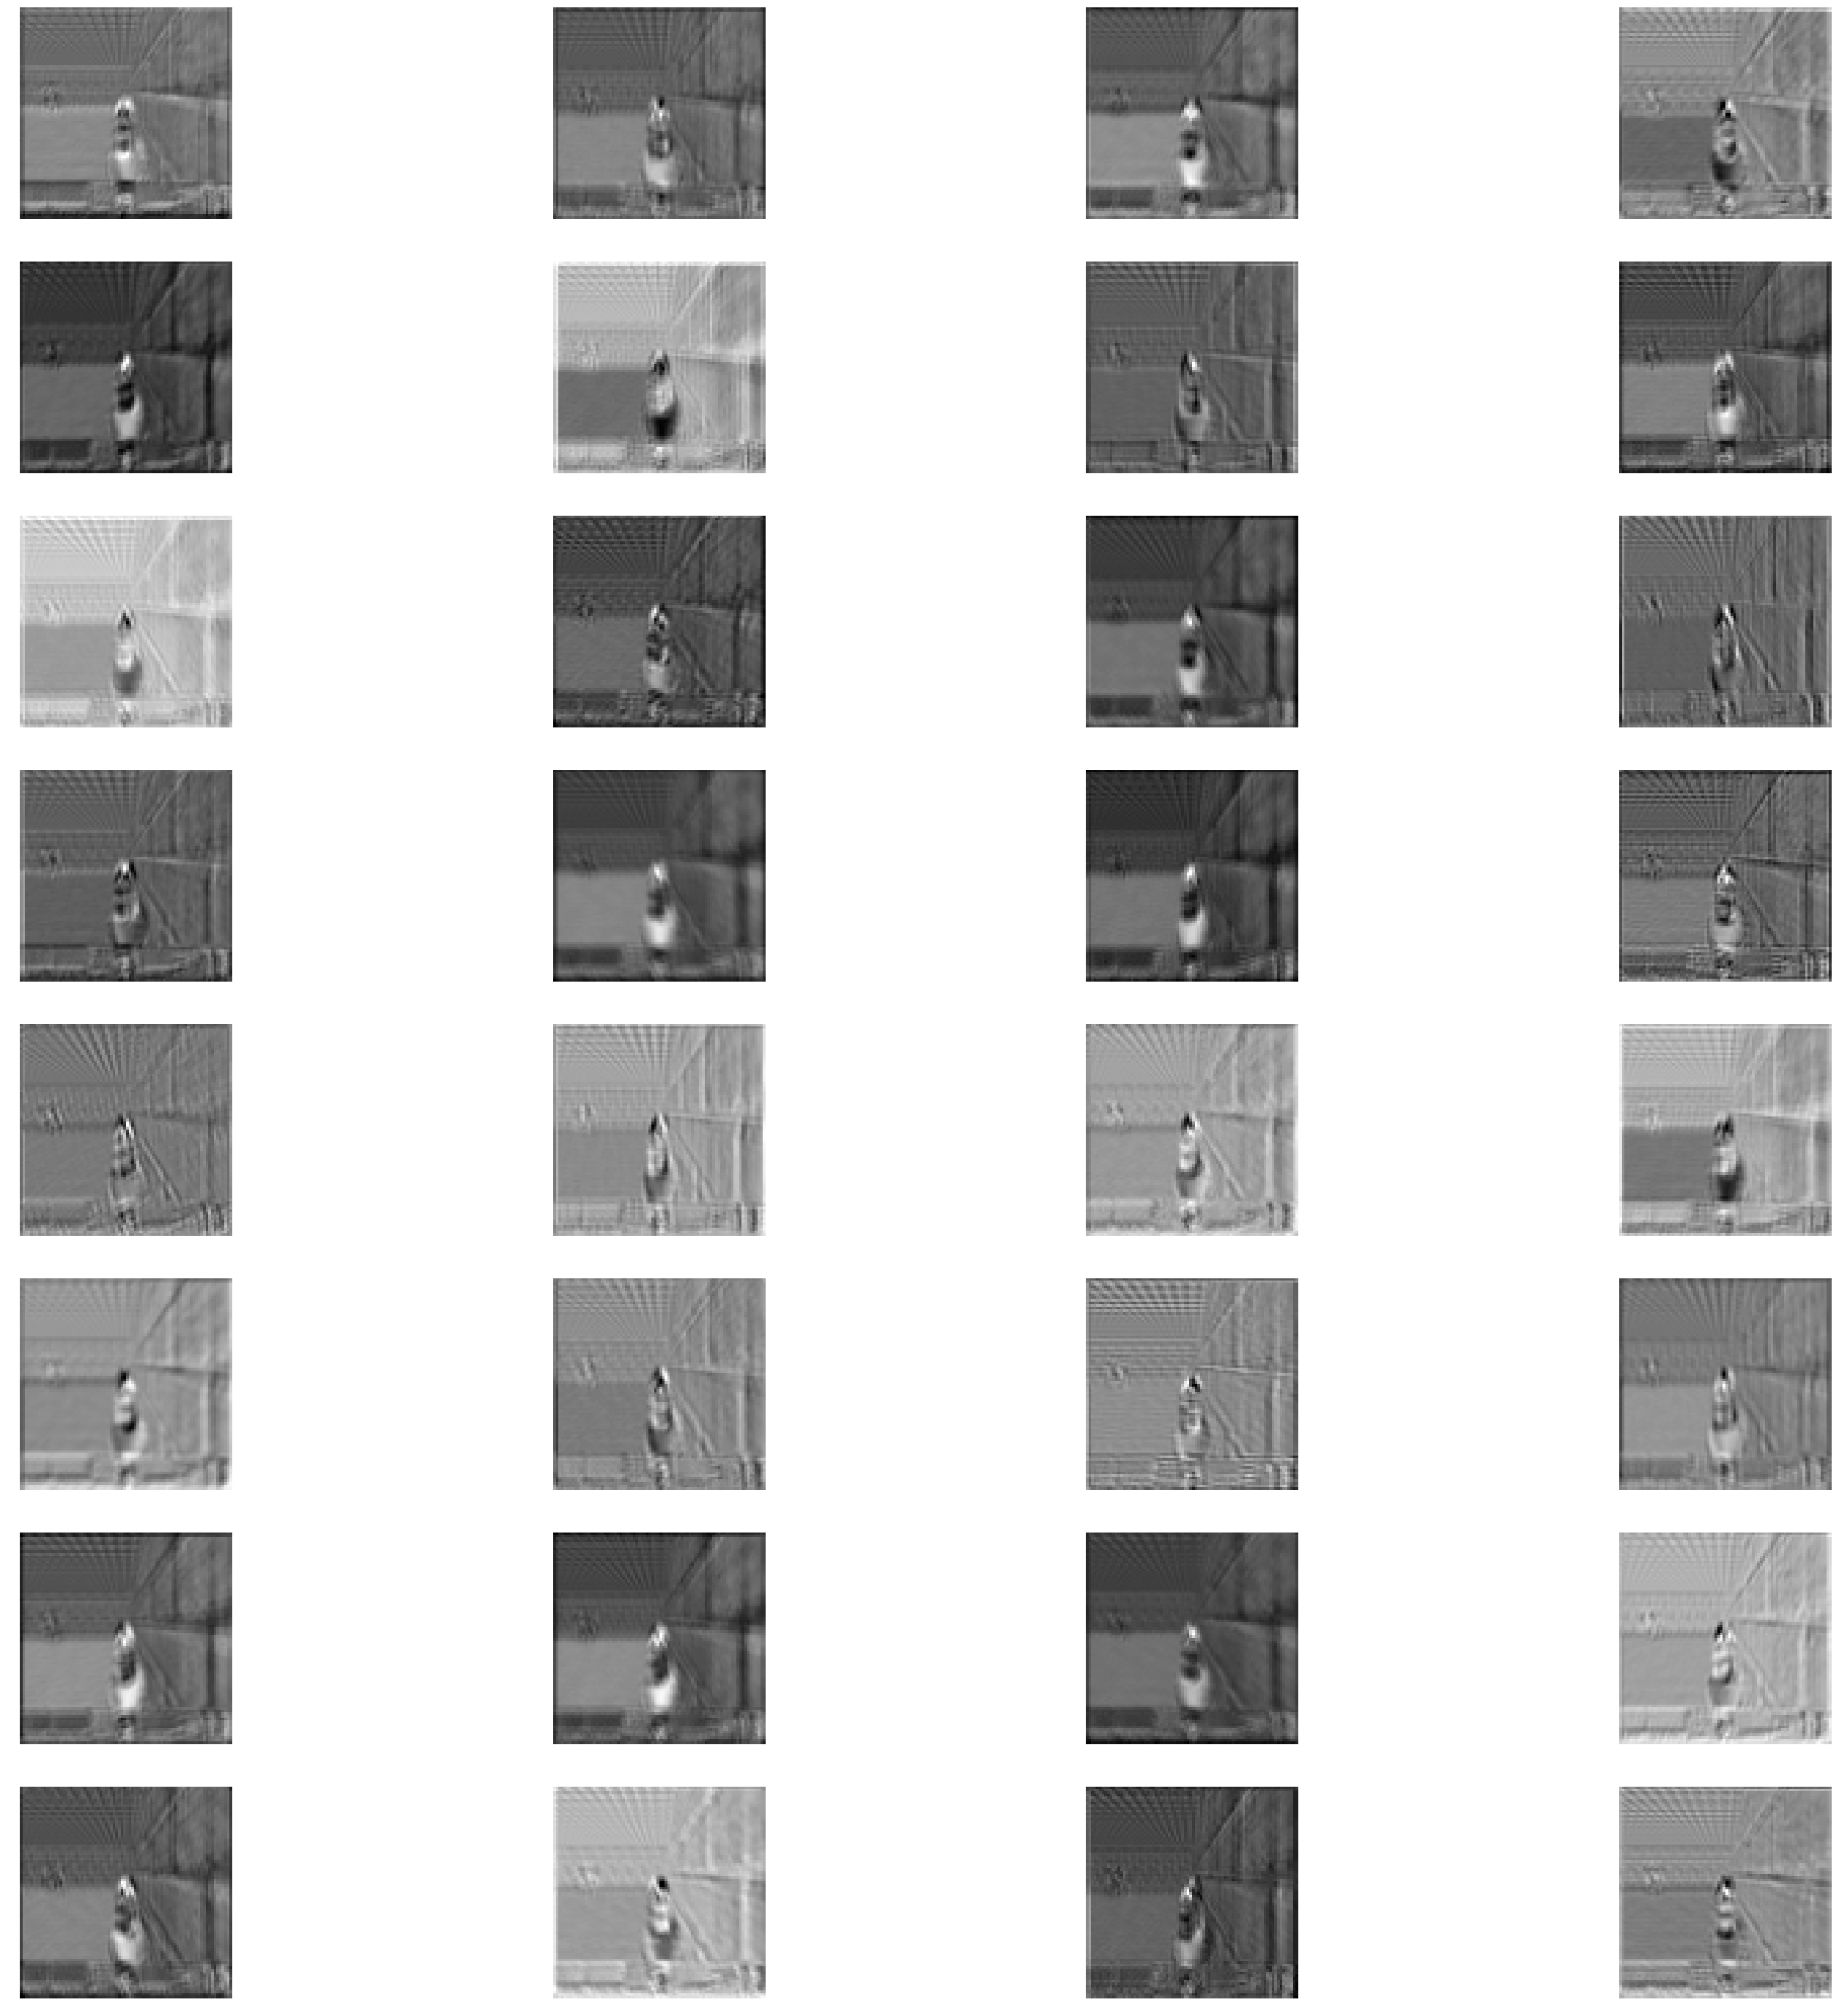

In [39]:
layer_1 = output[0][0, :, :, :]

layer_1 = layer_1.data

print(layer_1.size())

fig = plt.figure()
plt.figure(figsize=(50,50))
for idx, filt  in enumerate(layer_1):
    #print(filt[0, :, :])
    #.reshape(filt.shape[0], filt.shape[1])
    plt.subplot(8,4, idx + 1)
    plt.imshow(filt, cmap="gray")
    plt.axis('off')

    #plt.imshow(im.reshape(im.shape[0], im.shape[1])

plt.savefig(os.path.join(plot_path, 'layer_1_'+str(steps)))
# fig.show()

torch.Size([32, 38, 38])


<Figure size 432x288 with 0 Axes>

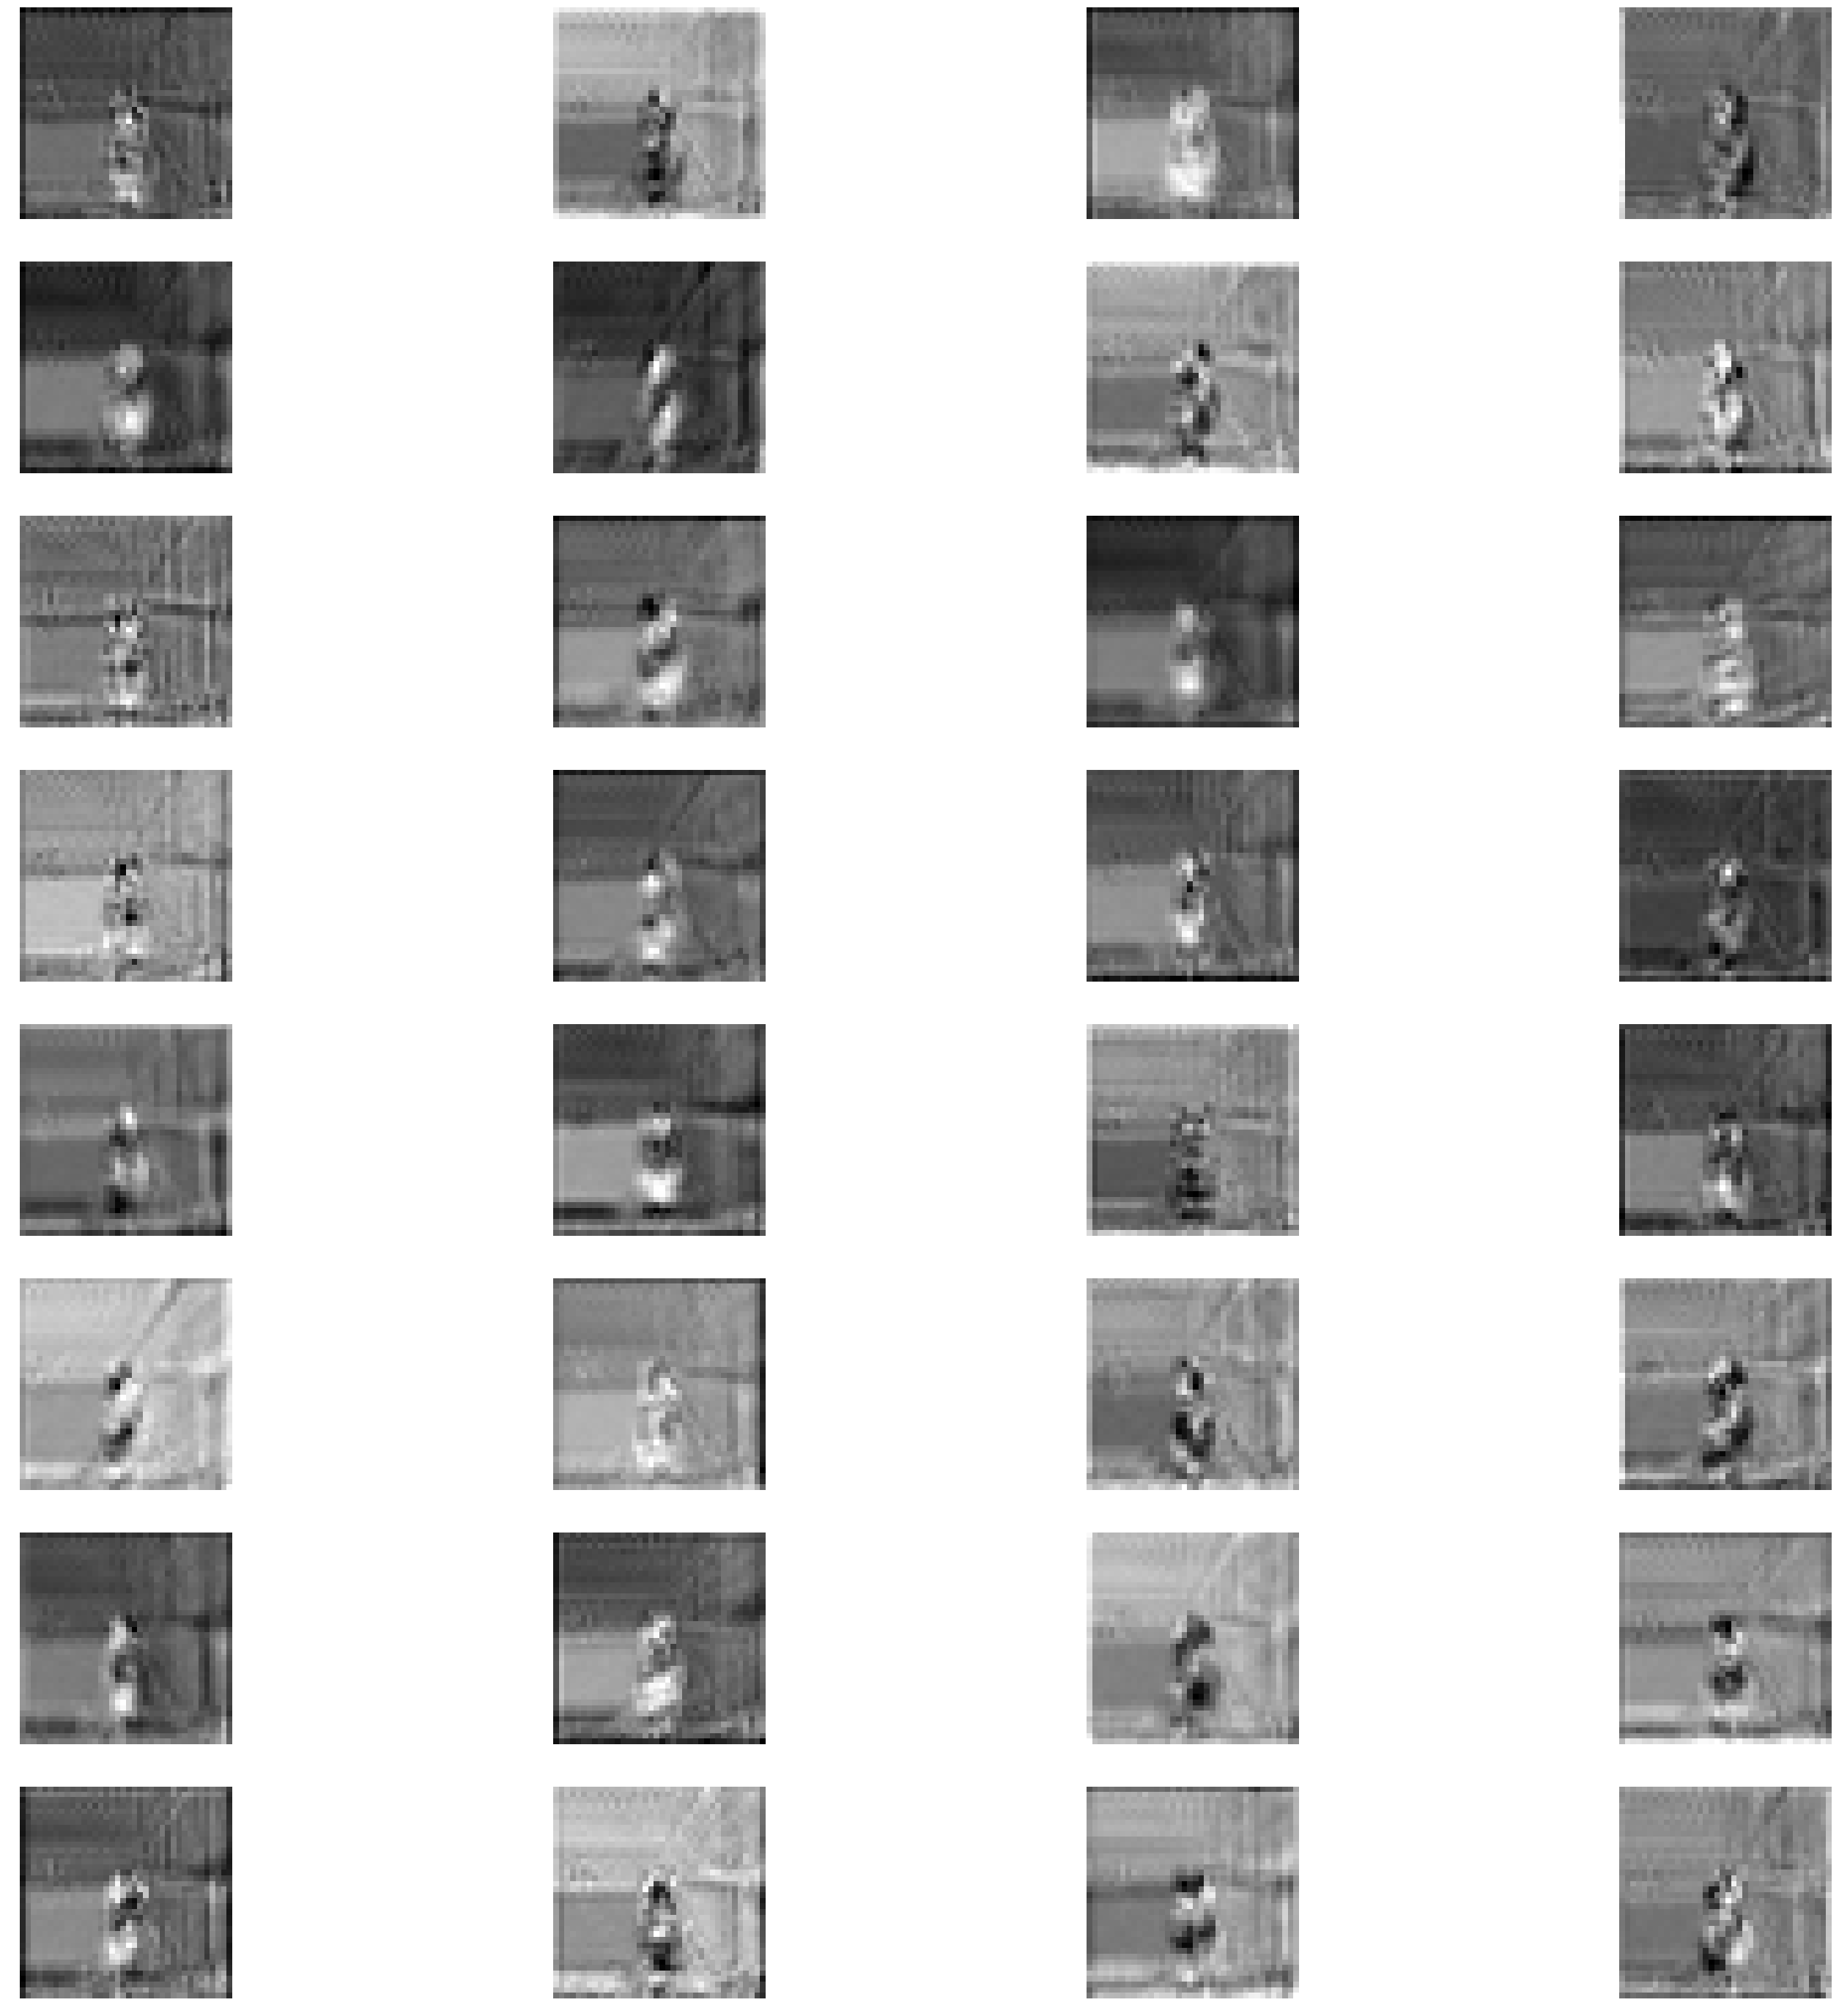

In [40]:
layer_2 = output[2][0, :, :, :]

layer_2 = layer_2.data

print(layer_2.size())

fig = plt.figure()
plt.figure(figsize=(50,50))
for idx, filt  in enumerate(layer_2):
    #print(filt[0, :, :])
    #.reshape(filt.shape[0], filt.shape[1])
    plt.subplot(8,4, idx + 1)
    plt.imshow(filt, cmap="gray")
    plt.axis('off')

    #plt.imshow(im.reshape(im.shape[0], im.shape[1])
    
plt.savefig(os.path.join(plot_path, 'layer_2_'+str(steps)))

torch.Size([64, 18, 18])


<Figure size 432x288 with 0 Axes>

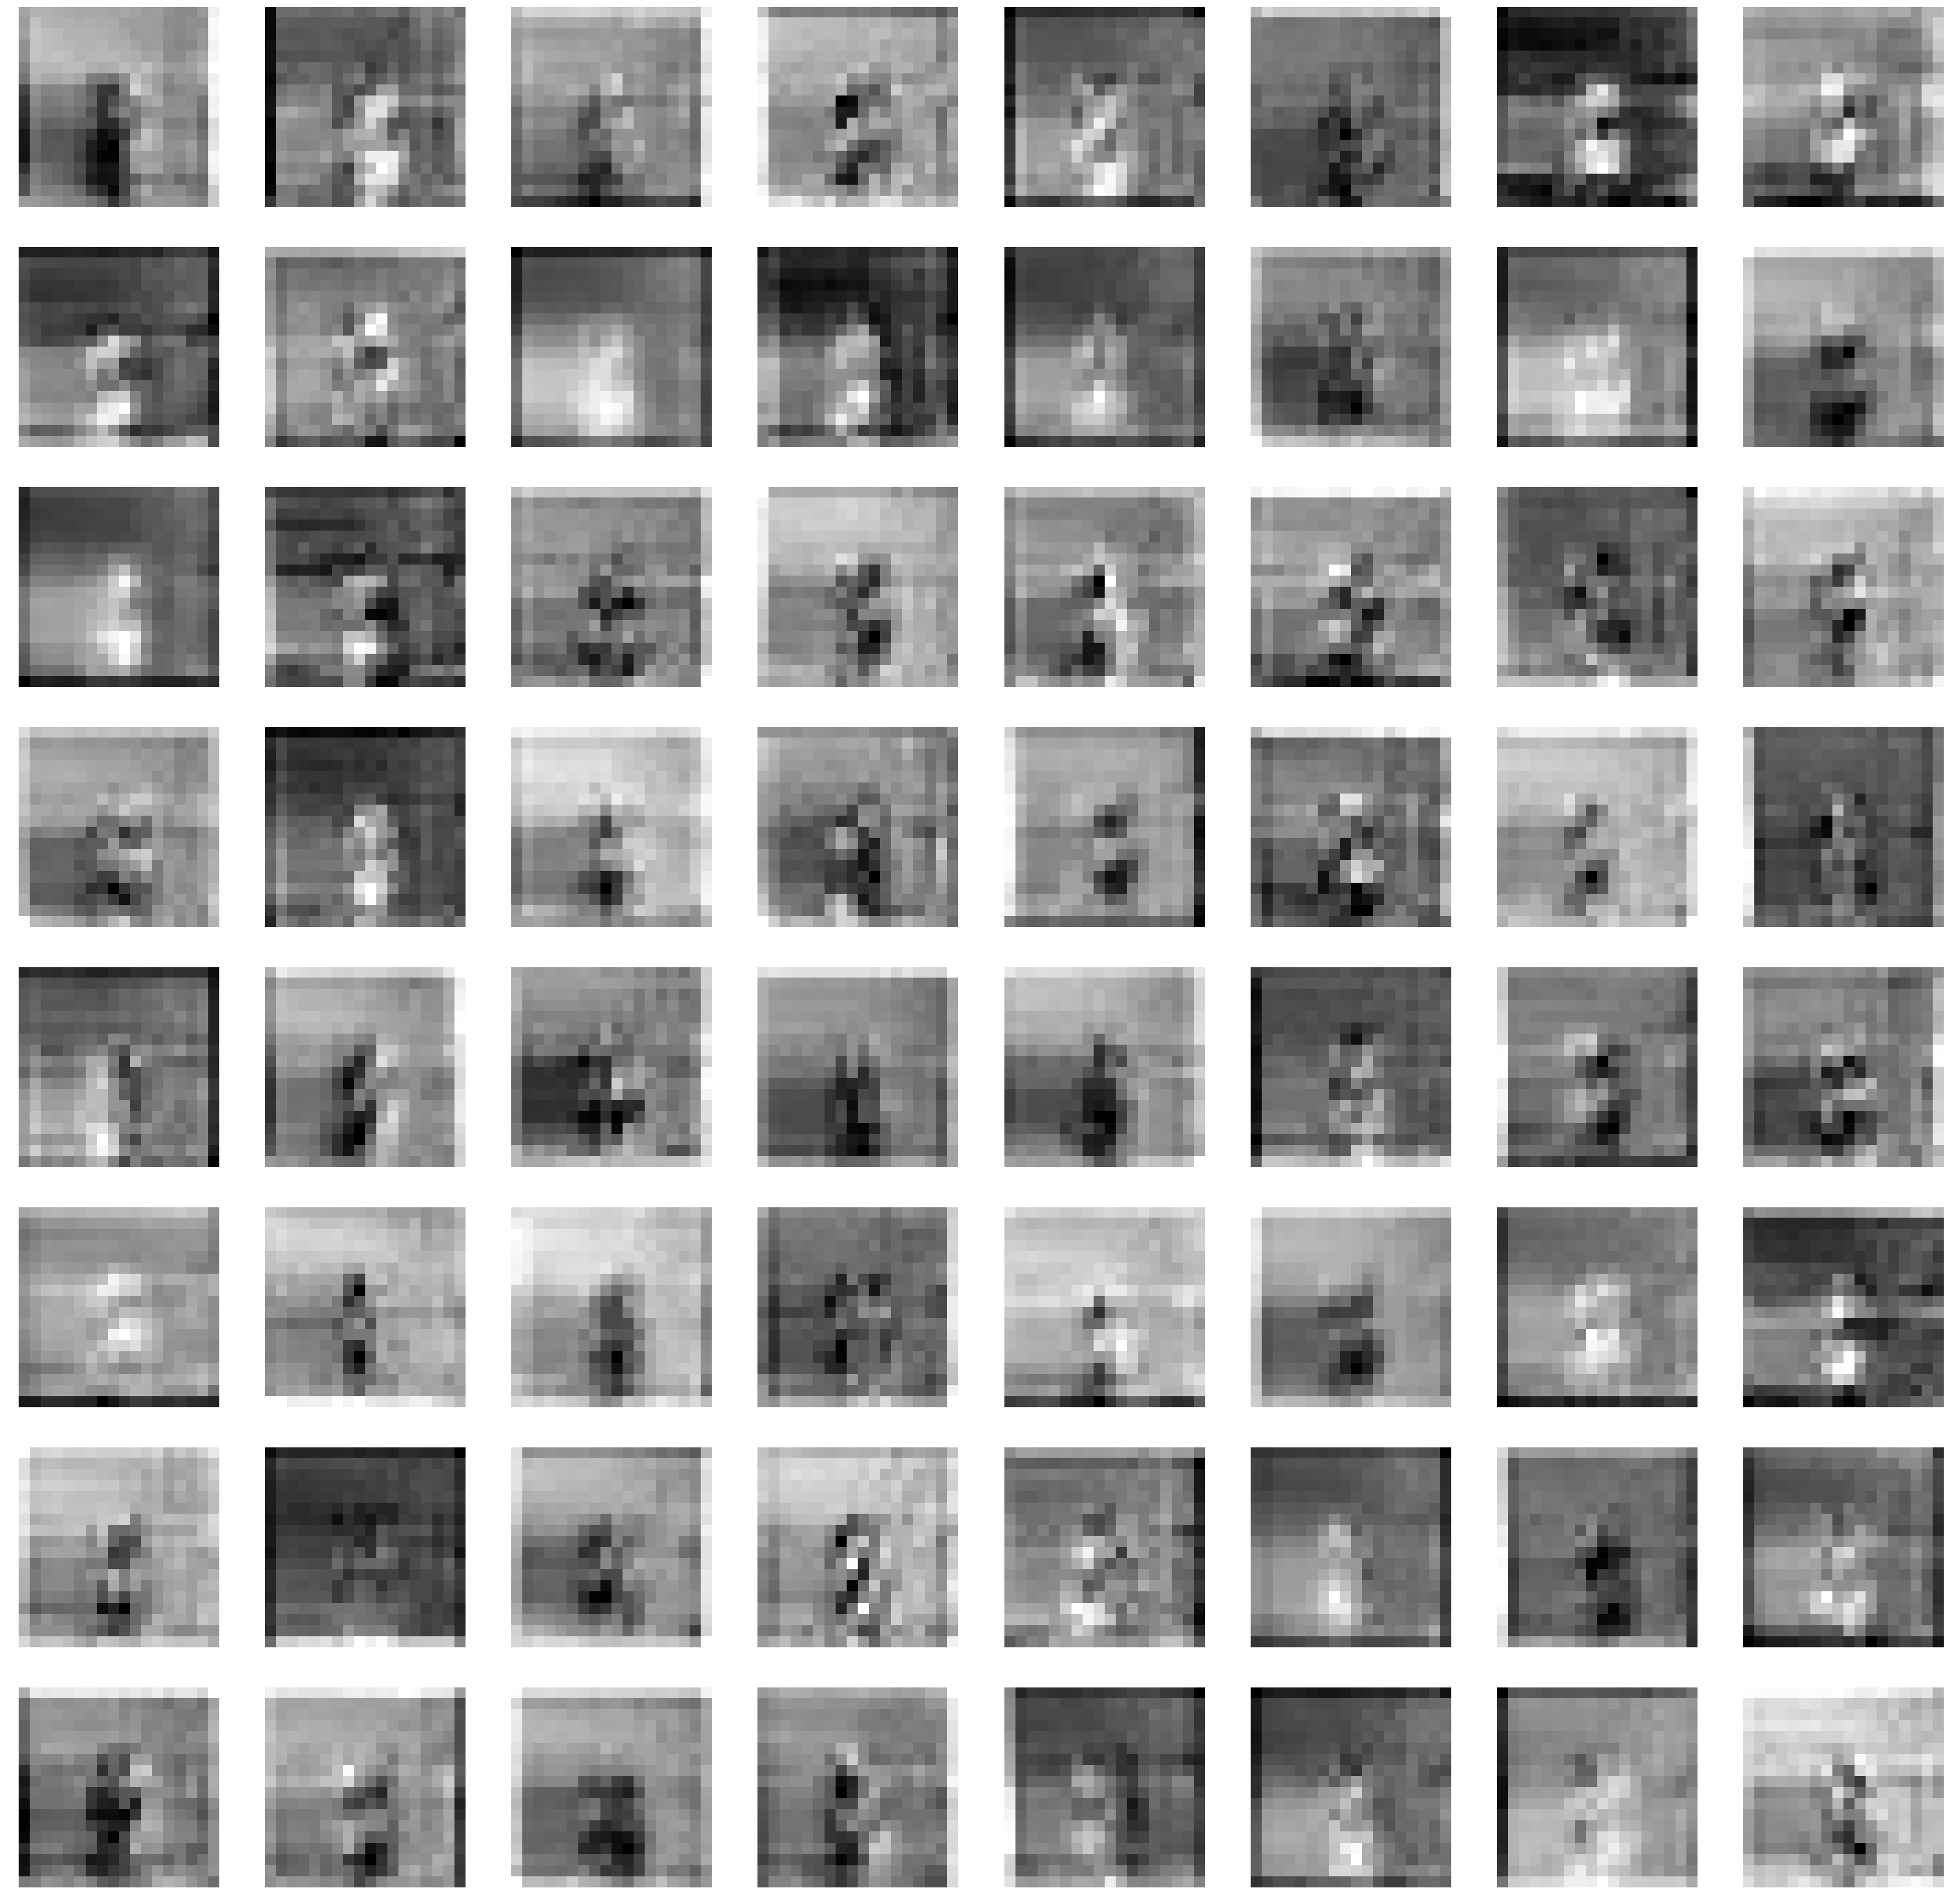

In [41]:
layer_3 = output[4][0, :, :, :]

layer_3 = layer_3.data

print(layer_3.size())

fig = plt.figure()
plt.figure(figsize=(50,50))
for idx, filt  in enumerate(layer_3):
    #print(filt[0, :, :])
    #.reshape(filt.shape[0], filt.shape[1])
    plt.subplot(8,8, idx + 1)
    plt.imshow(filt, cmap="gray")
    plt.axis('off')

    #plt.imshow(im.reshape(im.shape[0], im.shape[1])
    
plt.savefig(os.path.join(plot_path, 'layer_3_'+str(steps)))

torch.Size([64, 9, 9])


<Figure size 432x288 with 0 Axes>

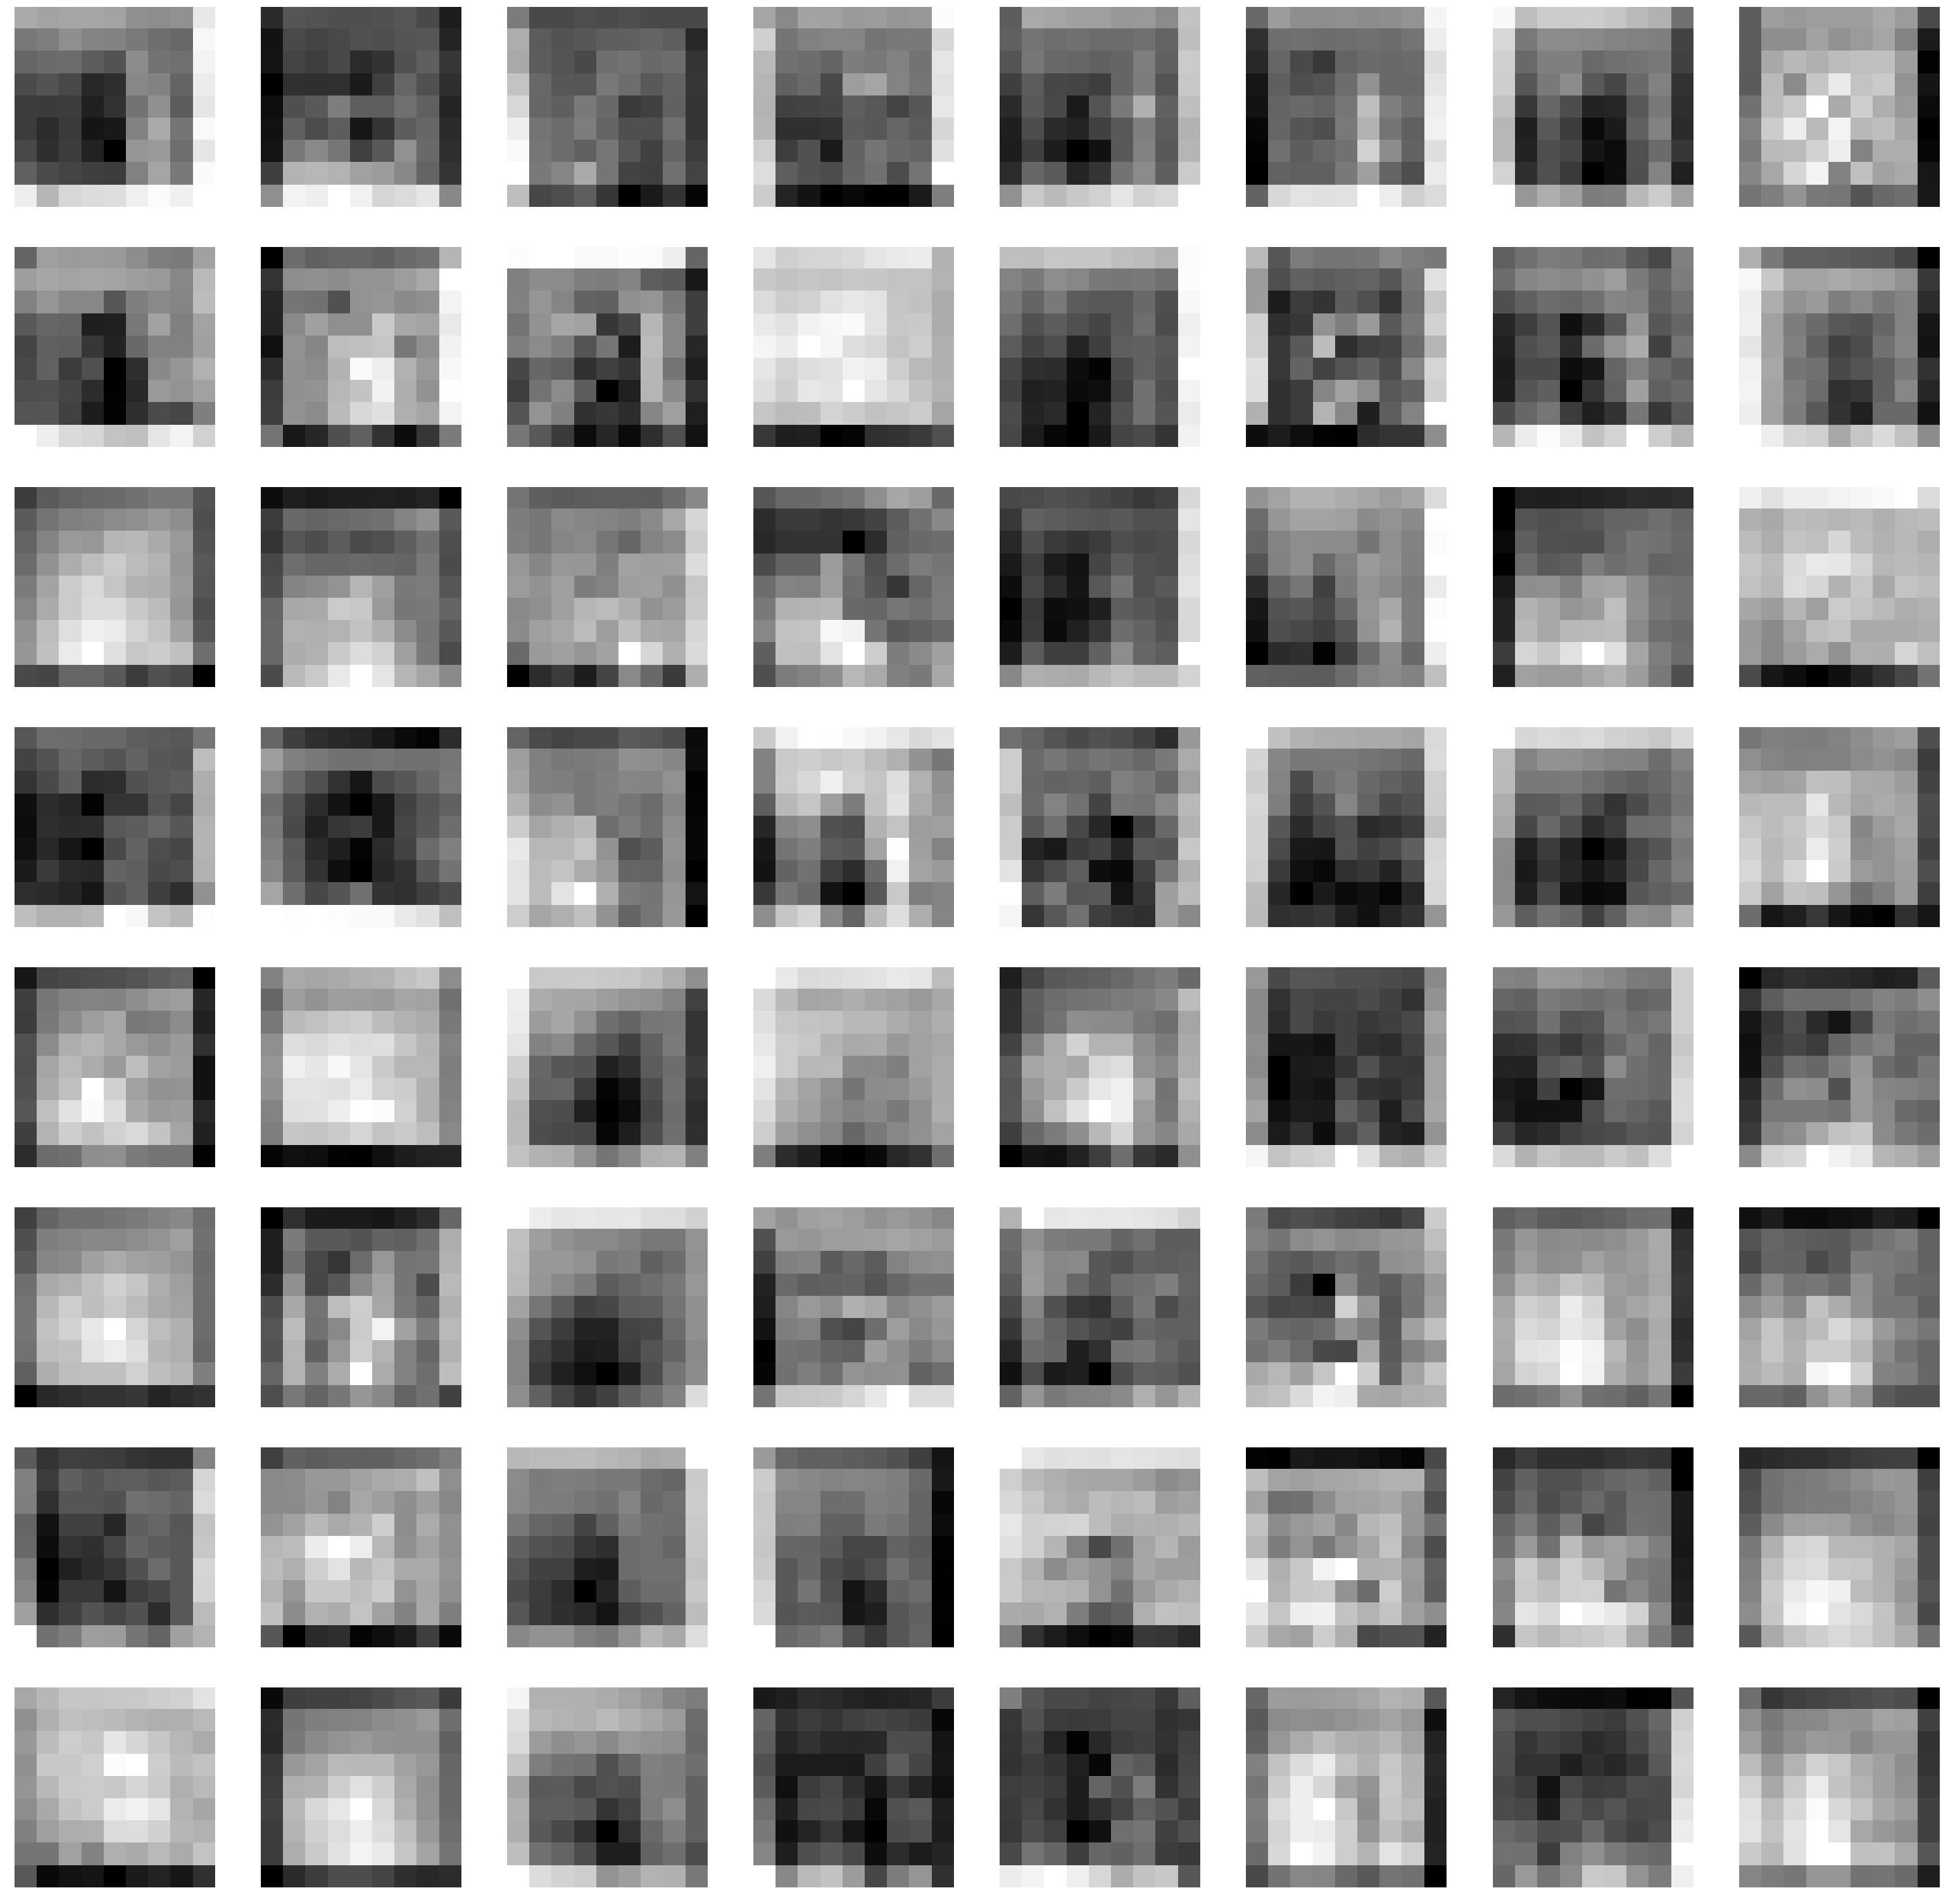

In [42]:
layer_4 = output[6][0, :, :, :]

layer_4 = layer_4.data

print(layer_4.size())

fig = plt.figure()
plt.figure(figsize=(50,50))
for idx, filt  in enumerate(layer_4):
    #print(filt[0, :, :])
    #.reshape(filt.shape[0], filt.shape[1])
    plt.subplot(8,8, idx + 1)
    plt.imshow(filt, cmap="gray")
    plt.axis('off')

    #plt.imshow(im.reshape(im.shape[0], im.shape[1])
    
plt.savefig(os.path.join(plot_path, 'layer_4_'+str(steps)))